In [1]:
#pair plots

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
# Load the car dataset from Seaborn (similar to MATLAB's 'carbig')
car_data = sns.load_dataset('mpg')

In [4]:
# Select the variables of interest
X = car_data[['mpg', 'acceleration', 'displacement', 'weight', 'horsepower']]

In [5]:
# Drop rows with NaN values (if any)
X = X.dropna()

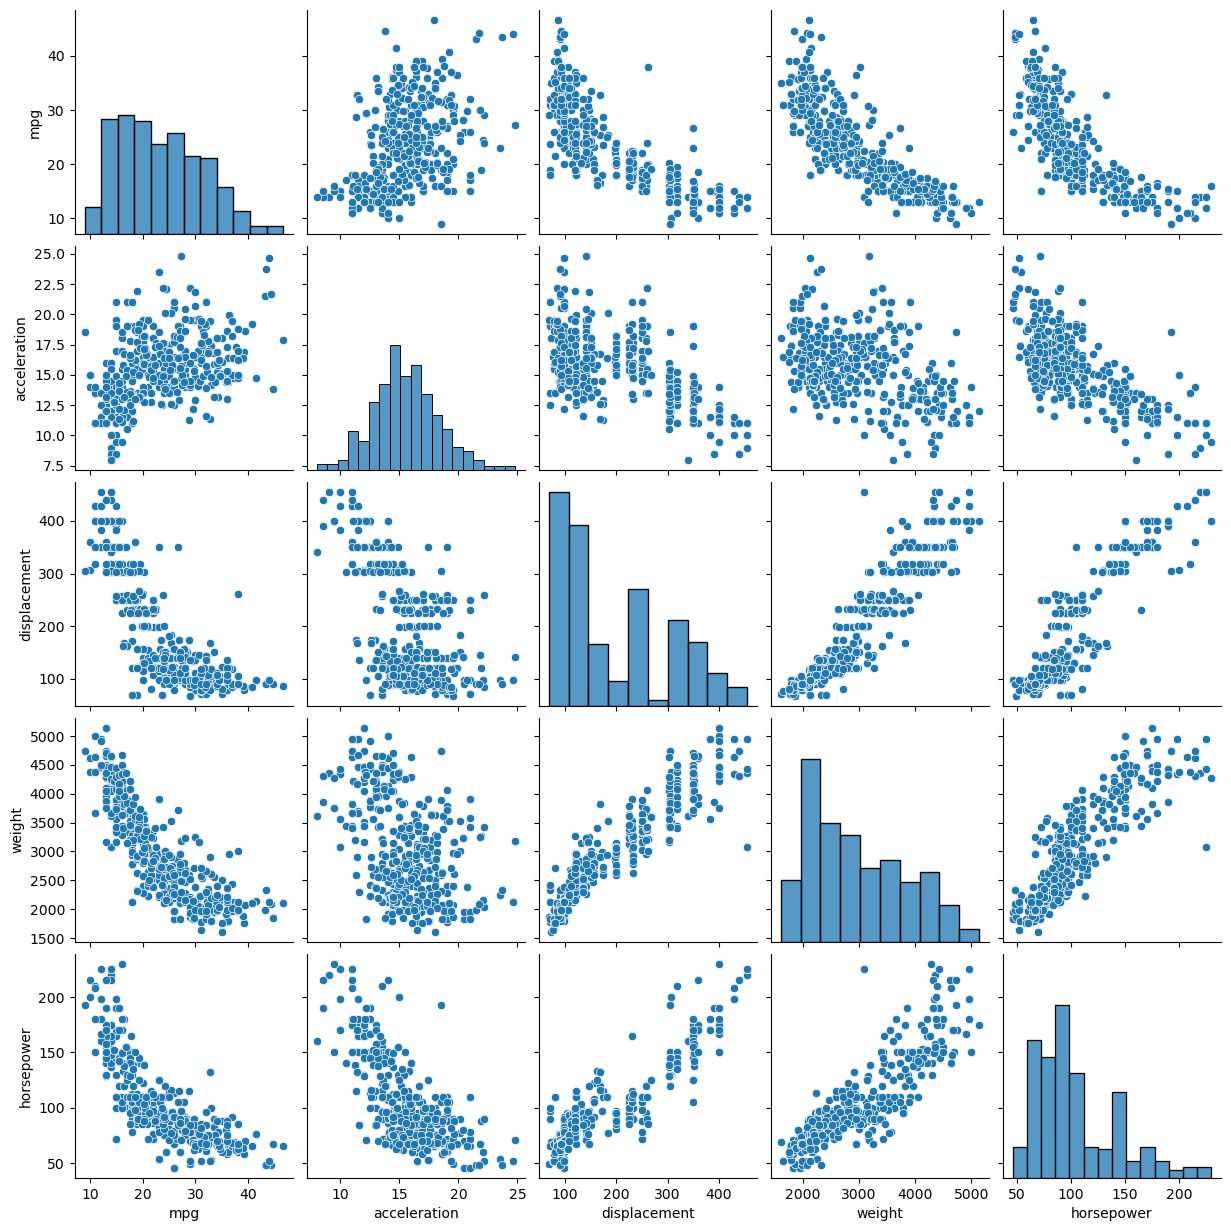

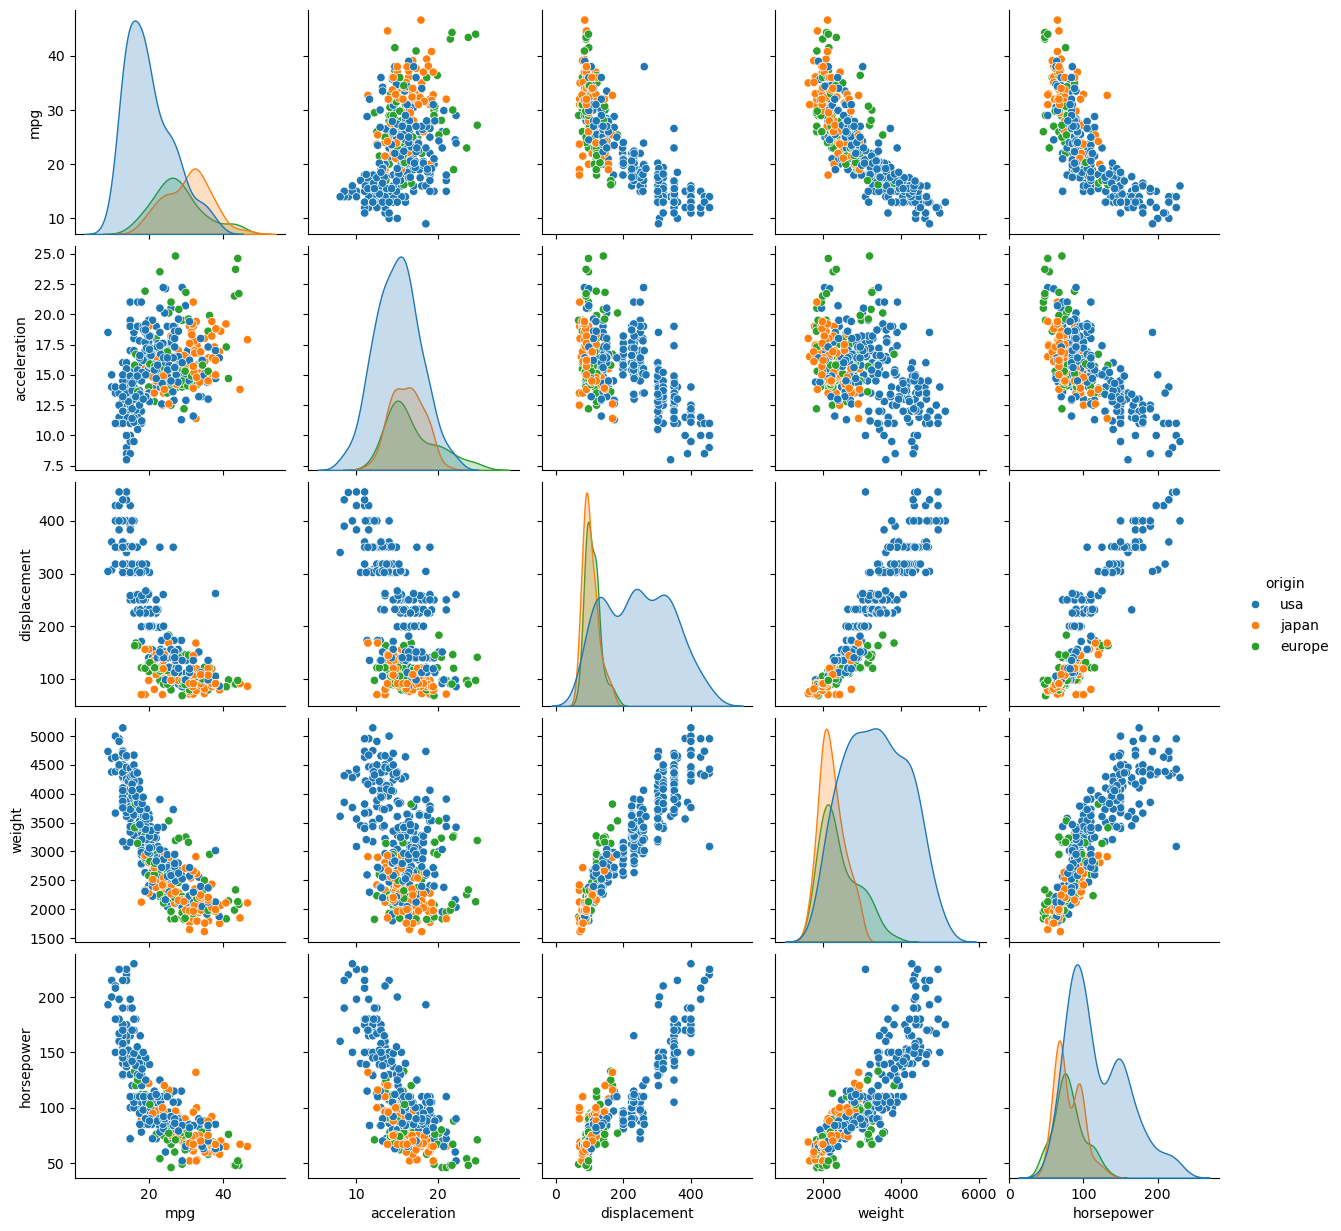

In [6]:
# Create a pair plot (similar to gplotmatrix in MATLAB)
sns.pairplot(X)
sns.pairplot(car_data[['mpg', 'acceleration', 'displacement', 'weight', 'horsepower', 'origin']], hue='origin')

In [7]:
# Parallel coordinate plots

In [8]:
# Filter the dataset to include only cars with 4, 6, or 8 cylinders (similar to Cyl468)
filtered_data = car_data[car_data['cylinders'].isin([4, 6, 8])]

In [9]:
# Normalize the selected columns (standardize='on')
X = filtered_data[['mpg', 'acceleration', 'displacement', 'weight', 'horsepower']]
X = (X - X.mean()) / X.std()  # Standardization

In [10]:
# Add the 'cylinders' column back for grouping
X['cylinders'] = filtered_data['cylinders'].astype(str)  # Convert to string for grouping

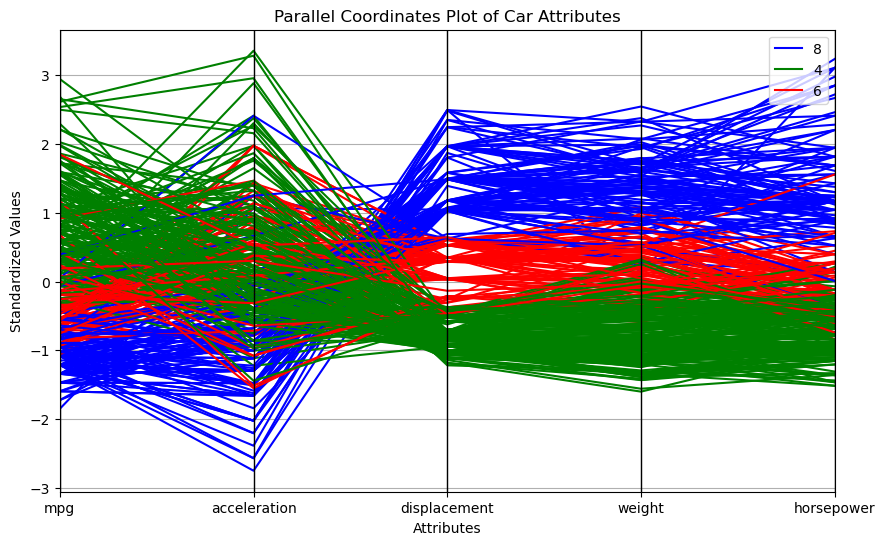

In [11]:
# Plot parallel coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(X, 'cylinders', color=['blue', 'green', 'red'])
plt.title('Parallel Coordinates Plot of Car Attributes')
plt.xlabel('Attributes')
plt.ylabel('Standardized Values')
plt.show()

In [12]:
#box plot

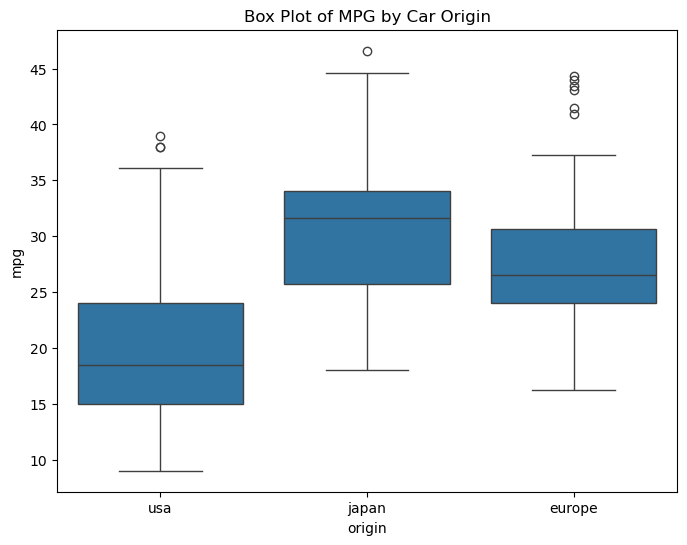

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the car dataset
car_data = sns.load_dataset('mpg')

# Create a box plot for MPG to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_data, x='origin', y='mpg')
plt.title('Box Plot of MPG by Car Origin')
plt.show()

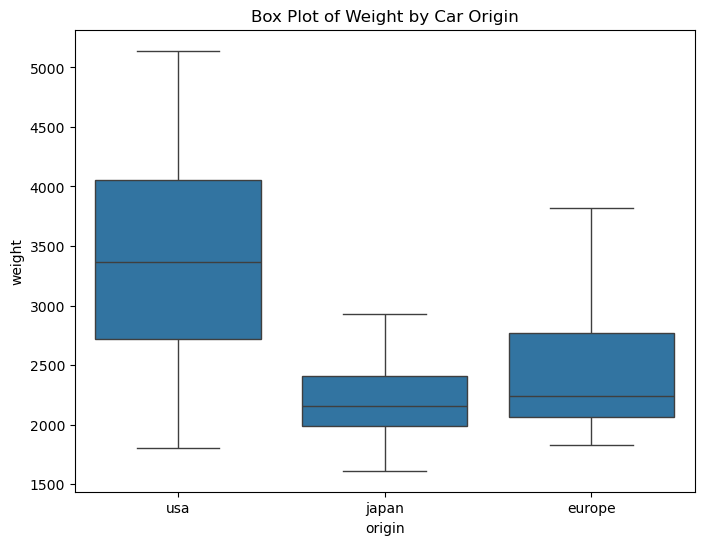

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the car dataset (mpg)
car_data = sns.load_dataset('mpg')

# Create a box plot for Weight to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_data, x='origin', y='weight')
plt.title('Box Plot of Weight by Car Origin')
plt.show()

In [15]:
#Radar or Polar plots

In [16]:
theta = np.arange(0, 2 * np.pi, 1.26)
theta

array([0.  , 1.26, 2.52, 3.78, 5.04])

In [17]:
stats = car_data.groupby('origin')[['mpg', 'acceleration', 'displacement', 'weight', 'horsepower']].mean()
stats

,mpg,acceleration,displacement,weight,horsepower
origin,,,,,
europe,27.891429,16.787143,109.142857,2423.300000,80.558824
japan,30.450633,16.172152,102.708861,2221.227848,79.835443
usa,20.083534,15.033735,245.901606,3361.931727,119.048980


In [18]:
normalized_data = stats.iloc[1, :] / stats.iloc[1, :].max()
normalized_data

mpg             0.013709
acceleration    0.007281
displacement    0.046240
weight          1.000000
horsepower      0.035942
Name: japan, dtype: float64

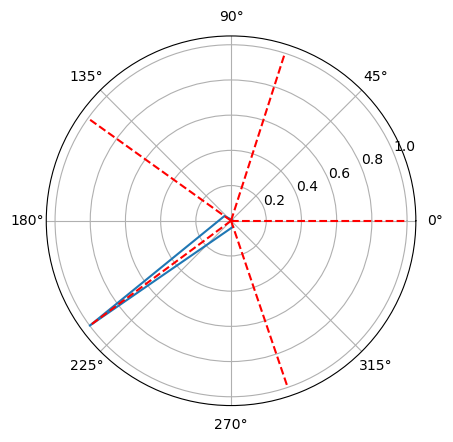

In [19]:
plt.axes(projection ='polar')
plt.polar(theta, normalized_data)

for angle in theta:
    plt.vlines(angle, 0, 1, color='red', linestyle='--')

plt.show()

In [20]:
#Andrews plot

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
X= iris.data
y= iris.target

In [31]:
df = pd.DataFrame(X,y)

In [33]:
df['Name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.head())

     0    1    2    3    Name
0  5.1  3.5  1.4  0.2  setosa
0  4.9  3.0  1.4  0.2  setosa
0  4.7  3.2  1.3  0.2  setosa
0  4.6  3.1  1.5  0.2  setosa
0  5.0  3.6  1.4  0.2  setosa


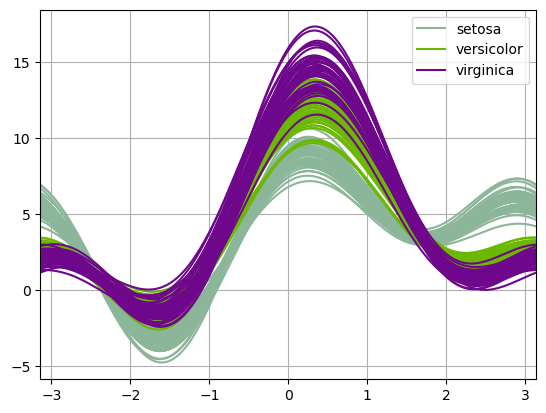

In [37]:
x = pd.plotting.andrews_curves(df, 'Name') 
  
# plotting the Curve 
x.plot() 
  
# Display 
plt.show()